# MNIST Dataset

Here we try our first neural network using Keras, which is a high level library which wraps most of the functionality in tensorflow.

Pay most attention to the section named `Keras Model`. The numpy, plotting functions should only be secondary considerations.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./', one_hot=True)

Using TensorFlow backend.


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
x, y = mnist.train.next_batch(20)
x.shape

(20, 784)

The above extracted 20 images from disk. The 784 comes from the fact that its a flattened 28x28 image.

In [3]:
28*28

784

`y` is the one-hot encoded labels. Meaning instead of simply stating that label is 0-9, it puts a 1 where the label is supposed to be and 0 else where. See below to have a better understanding:

In [4]:
y.shape

(20, 10)

In [5]:
y

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.

Visualise the first image (x[0]). Note that we need to reshape the flattened image before visualising:

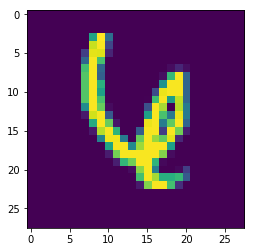

In [6]:
plt.imshow(x[0].reshape(28,28))
plt.show()

## Keras Model

In [7]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=784))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [9]:
def get_batch(dataset, batch_size = 256):
    while (1):
        yield dataset.next_batch(batch_size)

In [10]:
batch_size = 256
test_gen = get_batch(mnist.test, batch_size)
steps_per_epoch = mnist.test.num_examples// batch_size
print(model.metrics_names)
model.evaluate_generator(test_gen, steps_per_epoch)

['loss', 'acc']


[2.3435879976321488, 0.11398237179487179]

In [11]:
batch_size = 256
data_gen = get_batch(mnist.train, batch_size)
steps_per_epoch = mnist.train.num_examples//batch_size

model.fit_generator(data_gen, steps_per_epoch, epochs=1)

Epoch 1/1
214/214 [==============================] - 4s 17ms/step - loss: 0.4818 - acc: 0.8713


In [12]:
print(model.metrics_names)
model.evaluate_generator(test_gen, steps_per_epoch)

['loss', 'acc']


[0.21758297754225331, 0.93806585864485981]

It is really important to be able to reload the model after you've been training it for hours on end (usually). So save the model.

In [13]:
from keras.models import load_model

model.save('my_model.h5')

model2 = load_model('my_model.h5')

In [14]:
print(model.metrics_names)
model2.evaluate_generator(test_gen, steps_per_epoch)

['loss', 'acc']


[0.21843279912092975, 0.93788332359813087]

In [15]:
x, y = next(test_gen)

In [16]:
x.shape

(256, 784)

In [17]:
model.predict(x[:2])

array([[  1.52451648e-05,   1.47903456e-05,   1.41513236e-02,
          4.78248298e-03,   8.21043313e-01,   3.82098689e-04,
          1.12358015e-04,   2.21341243e-03,   2.04232382e-03,
          1.55242652e-01],
       [  2.42141556e-04,   3.43496067e-04,   3.40293569e-04,
          7.19094975e-03,   2.51231389e-03,   6.21199701e-03,
          4.26695769e-05,   9.41776454e-01,   1.90634897e-03,
          3.94334160e-02]], dtype=float32)

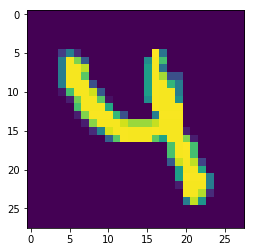

In [18]:
plt.imshow(x[0].reshape(28,28))

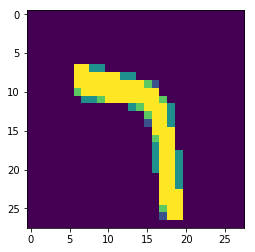

In [19]:
plt.imshow(x[1].reshape(28,28))

In [20]:
model.predict_classes(x[:2])

array([4, 7])

## Conclusion

There are only 3 things you need to remember.
1. Model Architecture.
2. model.fit(), don't worry too much about the generator part just yet. When you do lesson 5 we will ignore the generator functions. This is only useful if the data is too big to fit in memory.
3. model.predict() and model.predict_classes()

---